In [2]:
from pathlib import Path
import sys
project_root = str(Path(sys.path[0]).parents[0].absolute())
project_root
if project_root not in sys.path:
    sys.path.append(project_root)

from importlib import reload
    
from services.strategies import strategies

import pandas_datareader as pdr
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
import datetime as dt
import time
import matplotlib.pyplot as plt
from pathlib import Path
data_path = Path('.') / 'data'
import requests

In [3]:
reload(strategies)

<module 'services.strategies.strategies' from '/home/pmasse/pyfi/services/strategies/strategies.py'>

In [4]:
price_history = pd.DataFrame({
    'BTCEUR': {
        pd.to_datetime('2020-01-01'): 30100.,
        pd.to_datetime('2020-01-02'): 30090.,
        pd.to_datetime('2020-01-03'): 30110.,
        pd.to_datetime('2020-01-04'): 30120.,
        pd.to_datetime('2020-01-05'): 30070.,            
    }
})
price_history

,BTCEUR
2020-01-01,30100.0
2020-01-02,30090.0
2020-01-03,30110.0
2020-01-04,30120.0
2020-01-05,30070.0


In [5]:

portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
portfolio.assets
portfolio.add_asset('BTC', 100)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,100.0
2020-01-02,1000.0,100.0
2020-01-03,1000.0,100.0
2020-01-04,1000.0,100.0
2020-01-05,1000.0,100.0


In [6]:
portfolio.assets.loc[pd.to_datetime('2020-01-03'), 'BTC'] = 75
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,100.0
2020-01-02,1000.0,100.0
2020-01-03,1000.0,75.0
2020-01-04,1000.0,100.0
2020-01-05,1000.0,100.0


In [7]:
print(portfolio.get_asset_current_volume('BTC'))
print(portfolio.get_asset_current_volume('BTC', datetime=pd.to_datetime('2020-01-03')))

100.0
75.0


In [8]:
portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
portfolio.assets

,EUR
2020-01-01,1000.0
2020-01-02,1000.0
2020-01-03,1000.0
2020-01-04,1000.0
2020-01-05,1000.0


In [9]:
portfolio.update_asset_volume(asset_code='EUR', datetime=pd.to_datetime('2020-01-03'), increment=True, volume=-10)
portfolio.assets

,EUR
2020-01-01,1000.0
2020-01-02,1000.0
2020-01-03,990.0
2020-01-04,990.0
2020-01-05,990.0


In [10]:
portfolio.update_asset_volume(asset_code='BTC', datetime=pd.to_datetime('2020-01-02'), increment=True, volume=10)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,0.0
2020-01-02,1000.0,10.0
2020-01-03,990.0,10.0
2020-01-04,990.0,10.0
2020-01-05,990.0,10.0


In [12]:
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    price=30000.,
    datetime=pd.to_datetime('2020-01-03'),
    trade_type='buy',
)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,0.000
2020-01-02,1000.0,10.000
2020-01-03,0.0,10.033
2020-01-04,0.0,10.033
2020-01-05,0.0,10.033


In [14]:
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    price=30500.,
    trade_type='sell',
    volume=1.,
    allow_short_sale=True,
    datetime=pd.to_datetime('2020-01-03'),
)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,0.000
2020-01-02,1000.0,10.000
2020-01-03,30500.0,9.033
2020-01-04,30500.0,9.033
2020-01-05,30500.0,9.033


In [15]:
portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
portfolio.assets

,EUR
2020-01-01,1000.0
2020-01-02,1000.0
2020-01-03,1000.0
2020-01-04,1000.0
2020-01-05,1000.0


In [16]:
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    trade_type='buy',
    datetime=pd.to_datetime('2020-01-03'),
    price=price_history.loc[pd.to_datetime('2020-01-03'), 'BTCEUR'],
)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,0.000000
2020-01-02,1000.0,0.000000
2020-01-03,0.0,0.033212
2020-01-04,0.0,0.033212
2020-01-05,0.0,0.033212


In [17]:
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    trade_type='sell',
    datetime=pd.to_datetime('2020-01-04'),
    price=price_history.loc[pd.to_datetime('2020-01-04'), 'BTCEUR'],
)
portfolio.assets

,EUR,BTC
2020-01-01,1000.000000,0.000000
2020-01-02,1000.000000,0.000000
2020-01-03,0.000000,0.033212
2020-01-04,1000.332116,0.000000
2020-01-05,1000.332116,0.000000


In [18]:
reload(strategies)
portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    trade_type='buy',
    datetime=pd.to_datetime('2020-01-02'),
    price=price_history.loc[pd.to_datetime('2020-01-02'), 'BTCEUR'],
)
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    trade_type='sell',
    datetime=pd.to_datetime('2020-01-04'),
    price=price_history.loc[pd.to_datetime('2020-01-04'), 'BTCEUR'],
)
portfolio.assets

,EUR,BTC
2020-01-01,1000.000000,0.000000
2020-01-02,0.000000,0.033234
2020-01-03,0.000000,0.033234
2020-01-04,1000.997009,0.000000
2020-01-05,1000.997009,0.000000


In [19]:
portfolio.eval_performance(prices_history=price_history)

Return on period is: 0.10%
Annualized return on period is: 9.52%
Fees for trades are: 2.6000000028687733
Net return on period is: -0.16%
Annualized net return on period is: -13.62%


{'return_ratio': 0.0009970089730806375,
 'annualized_return_ratio': 0.09519425179936647,
 'total_fees': 2.6000000028687733,
 'net_return_ratio': -0.0016029910297881145,
 'net_annualized_return_ratio': -0.13617950657582545}

In [20]:
portfolio.historic_valorisation(prices_history=price_history)

,EUR,BTC
2020-01-01,1000.000000,0.000000
2020-01-02,0.000000,1000.000000
2020-01-03,0.000000,1000.664673
2020-01-04,1000.997009,0.000000
2020-01-05,1000.997009,0.000000


In [21]:
strat = strategies.CrossAverageStrategy(trading_pair='BTCEUR')

In [22]:
strat.generate_signals(3)

AttributeError: 'int' object has no attribute 'loc'

In [23]:
portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)

In [24]:
price_history

,BTCEUR
2020-01-01,30100.0
2020-01-02,30090.0
2020-01-03,30110.0
2020-01-04,30120.0
2020-01-05,30070.0


In [25]:
strat.evaluate(
    price_history=price_history,
    initial_portfolio=portfolio,
)

IndexError: list index out of range

In [ ]:
price_history

**Voir dessous pour chopper des données de kraken**

In [26]:
pair = 'XBTEUR'
ohlc = pd.read_csv(
    data_path / 'ohlc' / f'{pair}_1.csv',
    names=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trades'],
    index_col=None,
)
ohlc['datetime'] = ohlc['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x))
ohlc

,timestamp,open,high,low,close,volume,trades,datetime
0,1378856820,97.00,97.00,97.0,97.0,1.000000,1,2013-09-11 01:47:00
1,1378859580,99.90,99.90,99.9,99.9,0.100000,1,2013-09-11 02:33:00
2,1378859640,99.90,99.90,99.9,99.9,0.100000,1,2013-09-11 02:34:00
3,1378869720,98.20,98.20,98.2,98.2,0.100000,1,2013-09-11 05:22:00
4,1378875000,96.91,96.91,96.9,96.9,1.000000,2,2013-09-11 06:50:00
...,...,...,...,...,...,...,...,...
3091696,1617234900,49989.40,49998.70,49989.3,49989.3,0.033687,10,2021-04-01 01:55:00
3091697,1617234960,49989.30,49989.30,49969.2,49969.3,0.013282,5,2021-04-01 01:56:00
3091698,1617235020,49969.20,49969.20,49931.8,49969.2,1.197345,20,2021-04-01 01:57:00
3091699,1617235080,49969.10,49969.20,49969.1,49969.2,0.122786,8,2021-04-01 01:58:00


In [27]:
reload(strategies)

<module 'services.strategies.strategies' from '/home/pmasse/pyfi/services/strategies/strategies.py'>

In [28]:
price_history = ohlc.set_index('datetime')['close'].iloc[-60*24*2:].rename('BTCEUR').to_frame()
price_history

,BTCEUR
datetime,
2021-03-30 01:48:00,48967.9
2021-03-30 01:49:00,48967.9
2021-03-30 01:50:00,48915.7
2021-03-30 01:51:00,48899.5
2021-03-30 01:52:00,48899.5
...,...
2021-04-01 01:55:00,49989.3
2021-04-01 01:56:00,49969.3
2021-04-01 01:57:00,49969.2


Return on period is: 2.86%
Annualized return on period is: 16756.91%
Fees for trades are: 39.70558719086044
Net return on period is: -1.11%
Annualized net return on period is: -86.86%


{'return_ratio': 0.028603805377279468,
 'annualized_return_ratio': 167.56913755747266,
 'total_fees': 39.70558719086044,
 'net_return_ratio': -0.011101781813580902,
 'net_annualized_return_ratio': -0.8686189620819613}

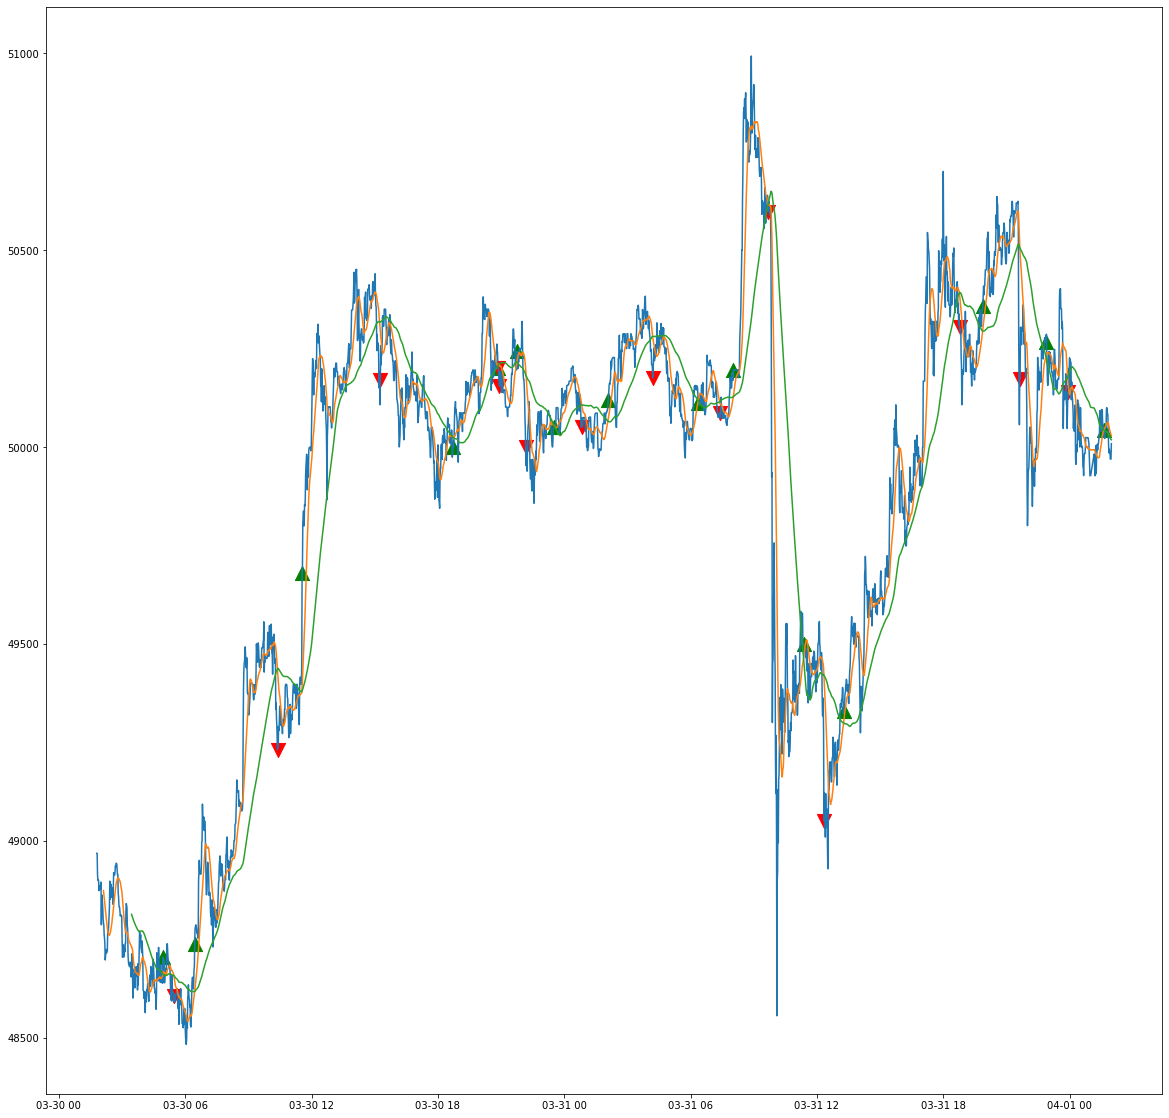

In [29]:
strat = strategies.CrossAverageStrategy(trading_pair='BTCEUR', long_window=100, short_window=20)
portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
strat.evaluate(
    price_history=price_history,
    initial_portfolio=portfolio,
    create_viz=True,
)

In [32]:
window_couples = [
    (100, 30),
    (100, 50),
    (110, 60),
    (100, 25),
    (90, 25),
]
vals = dict()
for long_window, short_window in window_couples:
    print(f"\n--------------{long_window} - {short_window} ----------------------")
    strat = strategies.CrossAverageStrategy(
        trading_pair='BTCEUR',
        long_window=long_window,
        short_window=short_window,
    )
    portfolio = strategies.VirtualPortfolio(
        initial_volumes={'EUR': 1000},
        datetimes=price_history.index
    )
    
    vals[(long_window, short_window)] = (
        strat.evaluate(
            price_history=price_history,
            initial_portfolio=portfolio,
            create_viz=False,
        )
    )




--------------100 - 30 ----------------------
Return on period is: 3.44%
Annualized return on period is: 46831.52%
Fees for trades are: 37.10227649223333
Net return on period is: -0.27%
Annualized net return on period is: -38.71%

--------------100 - 50 ----------------------
Return on period is: 0.66%
Annualized return on period is: 230.56%
Fees for trades are: 44.447827463065565
Net return on period is: -3.78%
Annualized net return on period is: -99.91%

--------------110 - 60 ----------------------
Return on period is: -0.59%
Annualized return on period is: -66.16%
Fees for trades are: 39.15996589820243
Net return on period is: -4.51%
Annualized net return on period is: -99.98%

--------------100 - 25 ----------------------
Return on period is: 3.77%
Annualized return on period is: 83641.72%
Fees for trades are: 37.2038800653134
Net return on period is: 0.05%
Annualized net return on period is: 9.70%

--------------90 - 25 ----------------------
Return on period is: 4.05%
Annualize

In [318]:
pd.DataFrame(vals

100           
                                     30         50
return_ratio                   0.034413   0.006598
annualized_return_ratio      468.315194   2.305564
total_fees                    37.102276  44.447827
net_return_ratio              -0.002689  -0.037850
net_annualized_return_ratio   -0.387092  -0.999102

In [293]:
(6465 - 6390) / 6390


0.011737089201877934

In [8]:
portfolio = strategies.VirtualPortfolio(initial_volumes=[['EUR', 1000]])

In [9]:
strat.evaluate(
    price_history=pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }),
    initial_portfolio=portfolio,
#     initial_free_value=100.,
)

Trading: buy BTC EUR at price 100.0 for volume None
Computed volume is 10.0
Trading: sell BTC EUR at price 120.0 for volume None
Computed volume is 10.0
Trading: buy BTC EUR at price 70.0 for volume None
Computed volume is 17.142857142857142
Evaluation of porfolio is: 1200.0
Percent return is: 20.00%
Annualized return is: 1679920291.85%


  asset_code     volume
0        EUR   0.000000
0        BTC  17.142857

In [10]:
strat.evaluate(
    price_history=pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }),
    initial_portfolio=portfolio,
#     initial_free_value=100.,
)

Trading: buy BTC EUR at price 100.0 for volume None
Computed volume is 0.0
Trading: sell BTC EUR at price 120.0 for volume None
Computed volume is 17.142857142857142
Trading: buy BTC EUR at price 70.0 for volume None
Computed volume is 29.387755102040813
Evaluation of porfolio is: 2057.142857142857
Percent return is: 20.00%
Annualized return is: 1679920291.85%


  asset_code     volume
0        EUR   0.000000
0        BTC  29.387755

In [11]:
(pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }).index.max()
-
pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }).index.min()
)

Timedelta('4 days 00:00:00')

In [12]:
dt.timedelta(days=3) / dt.timedelta(hours=6)

12.0

In [220]:
def cross_strat(
    price_series,
    short_window,
    long_window,
    ax=None,
):
    short_mv = price_series.rolling(short_window).mean(center=False)
    long_mv = price_series.rolling(long_window).mean(center=False)
    buys =  (short_mv > long_mv) & ~(short_mv > long_mv).shift(1).iloc[1:]
    sells = ~(short_mv > long_mv) & (short_mv > long_mv).shift(1).iloc[1:]
    
    if not ax:
        fig, ax = plt.subplots(figsize=(20, 20))
    
    ax.plot(price_series)
    ax.plot(short_mv)
    ax.plot(long_mv)
    
    idxs = buys | sells
    
    ax.scatter(buys[buys].index, price_series[buys[buys].index], marker="^", s=200, color='green')
    ax.scatter(sells[sells].index, price_series[sells[sells].index], marker="v", s=200, color='red')
    
    trades = pd.concat([price_series[sells[sells].index], price_series[buys[buys].index]], keys=['sell', 'buy'])
    rets = price_series[sells[sells].index].sum() - price_series[buys[buys].index].sum()
    print(rets)
    return(trades.swaplevel().sort_index(), idxs)

84.78998947143555


44

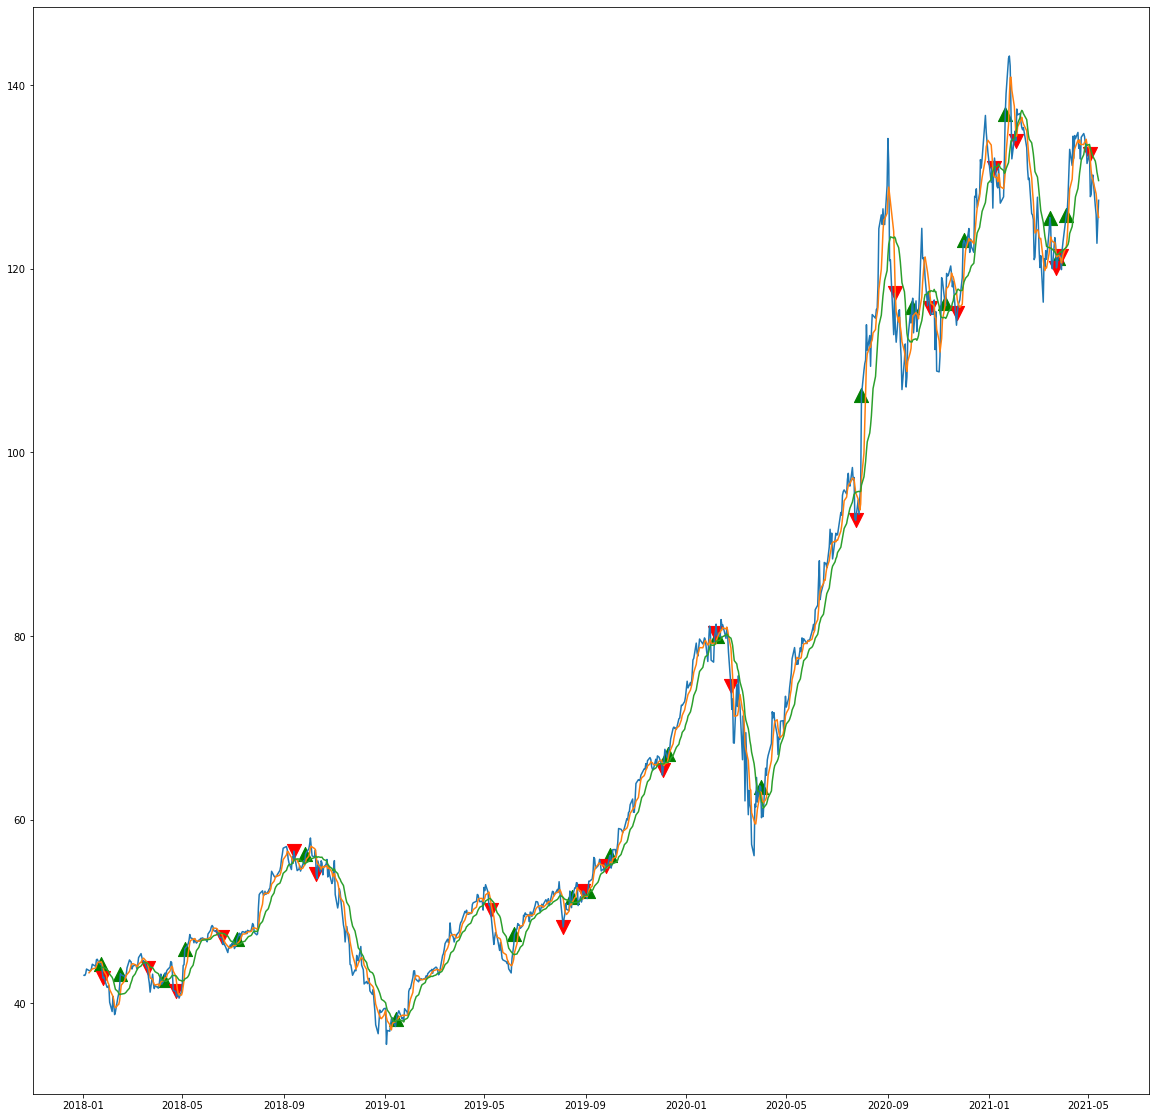

In [221]:
date_from = pd.to_datetime('2018-01-01')

cross_strat(
    pdr.get_data_yahoo(
        'AAPL',
        start=dt.datetime(2006, 1, 1),
        end=dt.datetime(2021, 5, 16),
    ).loc[idx[date_from:], 'Close'],
    5,
    15
)[1].sum()

Liste des assets et des paires tradables sur kraken :

In [15]:
asset_desc = pd.read_csv(
    Path('.') / 'krak_asset_desc.csv',
    sep=';',
).set_index('Code')
asset_desc

,Desc,Type,Statut
Code,,,
AAVE,Aave,Cryptocurrency,NaN
ADA,Cardano,Cryptocurrency,NaN
ALGO,Algorand,Cryptocurrency,NaN
ANKR,Ankr,Cryptocurrency,NaN
ANT,Aragon,Cryptocurrency,NaN
...,...,...,...
ZGBP,Great British Pound,Cash,NaN
ZJPY,Japanese Yen,Cash,NaN
ZKRW,South Korean Won,Cash,delisted


In [16]:
resp = requests.get('https://api.kraken.com/0/public/Assets')
resp.json()['result']

{'AAVE': {'aclass': 'currency',
  'altname': 'AAVE',
  'decimals': 10,
  'display_decimals': 5},
 'ADA': {'aclass': 'currency',
  'altname': 'ADA',
  'decimals': 8,
  'display_decimals': 6},
 'ADA.S': {'aclass': 'currency',
  'altname': 'ADA.S',
  'decimals': 8,
  'display_decimals': 6},
 'ALGO': {'aclass': 'currency',
  'altname': 'ALGO',
  'decimals': 8,
  'display_decimals': 5},
 'ANKR': {'aclass': 'currency',
  'altname': 'ANKR',
  'decimals': 10,
  'display_decimals': 5},
 'ANT': {'aclass': 'currency',
  'altname': 'ANT',
  'decimals': 10,
  'display_decimals': 5},
 'ATOM': {'aclass': 'currency',
  'altname': 'ATOM',
  'decimals': 8,
  'display_decimals': 6},
 'ATOM.S': {'aclass': 'currency',
  'altname': 'ATOM.S',
  'decimals': 8,
  'display_decimals': 6},
 'BAL': {'aclass': 'currency',
  'altname': 'BAL',
  'decimals': 10,
  'display_decimals': 5},
 'BAT': {'aclass': 'currency',
  'altname': 'BAT',
  'decimals': 10,
  'display_decimals': 5},
 'BCH': {'aclass': 'currency',
  'alt

In [17]:
resp = requests.get('https://api.kraken.com/0/public/AssetPairs')
for pair, desc in resp.json()['result'].items():
    try:
        print(
            pair,
            desc['altname'],
            desc['base'],
            asset_desc.loc[desc['base'], 'Desc'],
            desc['quote'],
            asset_desc.loc[desc['quote'], 'Desc'])
    except KeyError:
        print(pair)

AAVEAUD AAVEAUD AAVE Aave ZAUD Australian Dollar
AAVEETH AAVEETH AAVE Aave XETH Ethereum
AAVEEUR AAVEEUR AAVE Aave ZEUR Euro
AAVEGBP AAVEGBP AAVE Aave ZGBP Great British Pound
AAVEUSD AAVEUSD AAVE Aave ZUSD US Dollar
AAVEXBT AAVEXBT AAVE Aave XXBT Bitcoin
ADAAUD ADAAUD ADA Cardano ZAUD Australian Dollar
ADAETH ADAETH ADA Cardano XETH Ethereum
ADAEUR ADAEUR ADA Cardano ZEUR Euro
ADAGBP ADAGBP ADA Cardano ZGBP Great British Pound
ADAUSD ADAUSD ADA Cardano ZUSD US Dollar
ADAUSDT ADAUSDT ADA Cardano USDT Tether
ADAXBT ADAXBT ADA Cardano XXBT Bitcoin
ALGOETH ALGOETH ALGO Algorand XETH Ethereum
ALGOEUR ALGOEUR ALGO Algorand ZEUR Euro
ALGOGBP ALGOGBP ALGO Algorand ZGBP Great British Pound
ALGOUSD ALGOUSD ALGO Algorand ZUSD US Dollar
ALGOXBT ALGOXBT ALGO Algorand XXBT Bitcoin
ANKREUR ANKREUR ANKR Ankr ZEUR Euro
ANKRGBP ANKRGBP ANKR Ankr ZGBP Great British Pound
ANKRUSD ANKRUSD ANKR Ankr ZUSD US Dollar
ANKRXBT ANKRXBT ANKR Ankr XXBT Bitcoin
ANTETH ANTETH ANT Aragon XETH Ethereum
ANTEUR ANTEUR A

USDTAUD USDTAUD USDT Tether ZAUD Australian Dollar
USDTCAD USDTCAD USDT Tether ZCAD Canadian Dollar
USDTCHF
USDTEUR USDTEUR USDT Tether ZEUR Euro
USDTGBP USDTGBP USDT Tether ZGBP Great British Pound
USDTJPY USDTJPY USDT Tether ZJPY Japanese Yen
USDTZUSD USDTUSD USDT Tether ZUSD US Dollar
WAVESETH
WAVESEUR
WAVESUSD
WAVESXBT
XBTAUD XBTAUD XXBT Bitcoin ZAUD Australian Dollar
XBTCHF
XBTDAI XBTDAI XXBT Bitcoin DAI Dai
XBTUSDC XBTUSDC XXBT Bitcoin USDC USD Coin
XBTUSDT XBTUSDT XXBT Bitcoin USDT Tether
XDGEUR XDGEUR XXDG Dogecoin ZEUR Euro
XDGUSD XDGUSD XXDG Dogecoin ZUSD US Dollar
XDGUSDT XDGUSDT XXDG Dogecoin USDT Tether
XETCXETH ETCETH XETC Ethereum Classic XETH Ethereum
XETCXXBT ETCXBT XETC Ethereum Classic XXBT Bitcoin
XETCZEUR ETCEUR XETC Ethereum Classic ZEUR Euro
XETCZUSD ETCUSD XETC Ethereum Classic ZUSD US Dollar
XETHXXBT ETHXBT XETH Ethereum XXBT Bitcoin
XETHXXBT.d ETHXBT.d XETH Ethereum XXBT Bitcoin
XETHZCAD ETHCAD XETH Ethereum ZCAD Canadian Dollar
XETHZCAD.d ETHCAD.d XETH Ethere

Récupération des cours du jour : 

In [18]:
def get_ohlc(pair):
    resp = requests.get(f'https://api.kraken.com/0/public/OHLC?pair={pair}')
    data = (
        pd.json_normalize(
            resp.json(),
            record_path=['result', pair],
        ).rename(
            {
                0: 'timestamp',
                1: 'open',
                2: 'high',
                3: 'low',
                4: 'close',
                5: 'vwap',
                6: 'volume',
                7: 'count',
            },
            axis=1,
        ).astype(
            'float'
        ).assign(
            datetime=lambda x: x.timestamp.apply(lambda y: dt.datetime.fromtimestamp(y))
        ).set_index('datetime')
    )
    return(data)

<AxesSubplot:xlabel='datetime'>

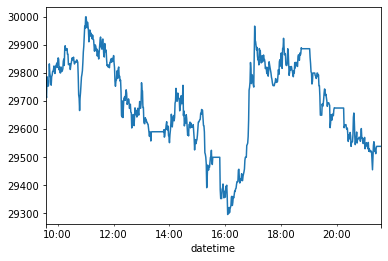

In [19]:
get_ohlc('XXBTZEUR')['close'].plot()

In [294]:
(30000 - 29300) / 29300

0.023890784982935155

Construction de l'ohlc à partir des historiques de trades :

In [291]:
def get_ohlc_from_hist(
    pair,
    step='1D',
    start=None,
    end=None,
):
    trades = pd.read_csv(
        data_path / 'trades' / f'{pair}.csv',
        names=['timestamp', 'price', 'volume'],
    )
    trades['datetime'] = (
        trades['timestamp']
        .apply(lambda x: dt.datetime.fromtimestamp(x))
    )
    if start:
        trades = trades.loc[trades['datetime'] >= start]
    if end:
        trades = trades.loc[trades['datetime'] <= end]
    trades = trades.sort_values('datetime')
    ohlc = (
        trades
        .resample(step, on='datetime')
        ['price']
        .agg(['first', 'max', 'min', 'last'])
        .ffill()
        .rename(
            {
                'first': 'open',
                'max': 'high',
                'min': 'low',
                'last': 'close',
            },
            axis=1
        )
    )        
    
    return(ohlc)

get_ohlc_from_hist('XBTEUR', '1M', None, None)

,open,high,low,close
datetime,,,,
2013-09-30,97.00000,99.90000,90.00000,94.50000
2013-10-31,94.50000,159.00000,81.00000,149.80000
2013-11-30,150.00000,872.90000,148.54547,851.00001
2013-12-31,851.00002,851.00002,242.95911,537.06000
2014-01-31,539.00000,734.90000,535.00000,594.00000
...,...,...,...,...
2020-12-31,16284.00000,23860.00000,14510.00000,23814.70000
2021-01-31,23814.80000,34140.00000,21888.80000,27210.10000
2021-02-28,27214.10000,48000.00000,26700.00000,37459.20000


In [225]:
%%time
prices = get_ohlc_from_hist('XBTEUR', '1min', pd.to_datetime('01-01-2020'), pd.to_datetime('2020-01-02'))['close']
prices

CPU times: user 41.8 s, sys: 5.18 s, total: 47 s
Wall time: 47 s


datetime
2020-01-01 00:00:00    6410.0
2020-01-01 00:01:00    6410.3
2020-01-01 00:02:00    6412.3
2020-01-01 00:03:00    6409.9
2020-01-01 00:04:00    6401.6
                        ...  
2020-01-01 23:55:00    6393.0
2020-01-01 23:56:00    6393.1
2020-01-01 23:57:00    6396.3
2020-01-01 23:58:00    6399.9
2020-01-01 23:59:00    6399.9
Freq: T, Name: close, Length: 1440, dtype: float64

(0.0, 7000.0)

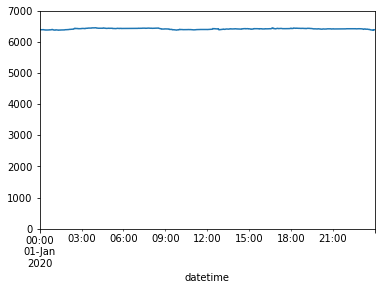

In [290]:
ax = prices.plot()
ax.set_ylim(0, 7000)

In [ ]:
%%time
cross_strat(
    prices,
    50,
    100,
)

In [ ]:
def nonce_unix_microseconds():
    now = dt.datetime.now().timestamp() 
    return(int(now * 1e6))

In [ ]:
nonce_unix_microseconds()

In [ ]:
import urllib.parse
import hashlib
import hmac
import base64

def get_kraken_signature(urlpath, data, secret):

    postdata = urllib.parse.urlencode(data)
    encoded = (str(data['nonce']) + postdata).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode()

api_sec = "kQH5HW/8p1uGOVjbgWA7FunAmGO8lsSUXNsu3eow76sz84Q18fWxnyRzBHCd3pd5nE9qa99HAZtuZuj6F1huXg=="

data = {
    "nonce": "1616492376594", 
    "ordertype": "limit", 
    "pair": "XBTUSD",
    "price": 37500, 
    "type": "buy",
    "volume": 1.25
}

signature = get_kraken_signature("/0/private/AddOrder", data, api_sec)
print("API-Sign: {}".format(signature))